# Эксперимент

В данной работе я воспользовался экспериментом, который мы использовали для того, чтобы познакомиться со случайными величинами. Если кратко, то здесь приведены измерения нескольких грузиков примерно одинаковой массы, однако они отличаются из-за каких-либо заводских дефектов, осаждения пыли или других частиц на них и т.д.

Опыт может показаться довольно скучным (так и есть), но другими опытами я не воспользовался: либо из-за малого количества измерений, либо из-за проблем с установками

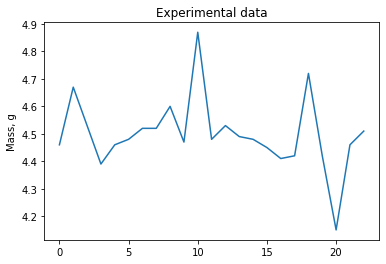

In [8]:
%matplotlib inline  

import pandas
import random

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

weights = [4.46, 4.67, 4.53, 4.39, 4.46, 4.48, 4.52, 4.52, 4.60, 4.47, 4.87, 4.48, 4.53, 4.49, 4.48, 4.45, 4.41, 4.42, 4.72, 4.42, 4.15, 4.46, 4.51]


plt.plot(list(range(len(weights))), weights)
plt.ylabel('Mass, g')
plt.title('Experimental data')
plt.show()

In [9]:
df = pandas.DataFrame(data={
    'weights': weights
})
df.to_csv("weights.csv")

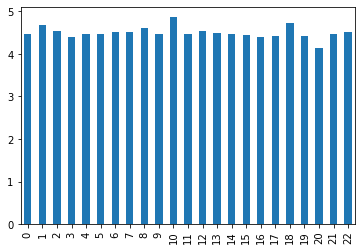

In [26]:
try:
    del df
except:
    pass

df1 = pandas.read_csv("weights.csv")

#Попробуем также посмотреть на нормальное распределение 
normals = np.random.normal(df1.weights.mean(), df1.weights.std(), len(df1.weights))

#Здесь я использую значения, которые я получил самостоятельно
mydigit = np.random.normal(4.5, 0.131, 23)

df1['weights'].plot(kind='bar')

count    23.000000
mean      4.499565
std       0.133467
min       4.150000
25%       4.455000
50%       4.480000
75%       4.525000
max       4.870000
Name: weights, dtype: float64


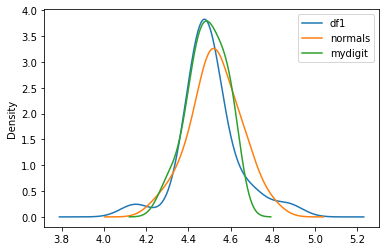

In [27]:
print(df1.weights.describe())

pack = pandas.DataFrame(data={
    'df1': df1['weights'],
    'normals': normals,
    'mydigit': mydigit
})

pack.plot.kde()

In [28]:
d1 = pack['df1']
normals = pack['normals']
mydigit = pack['mydigit']

print(stats.kstest(d1, 'norm', (d1.mean(), d1.std()), N=len(d1)))
print(stats.kstest(d1, 'norm', (normals.mean(), normals.std()), N=len(normals)))
print(stats.kstest(d1, 'norm', (mydigit.mean(), mydigit.std()), N=len(mydigit)))

KstestResult(statistic=0.23589753098119404, pvalue=0.13091671650758352)
KstestResult(statistic=0.3211663544376364, pvalue=0.013059436593151452)
KstestResult(statistic=0.14855153104104413, pvalue=0.637234215924986)


Видно, что наше распределение достаточно "нормальное", что не может не радовать.
Кроме того, приятно, что собственные расчеты совпадают с расчетами компьютера, хотя К-С статистика и P-значение не совсем согласны с этим
Однако медианное значение среднеквадратичное значение совпадают со значениями, вычисленными машиной.